In [25]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from keras import optimizers
from tensorflow.keras.optimizers import SGD
from keras import initializers
import numpy as np
from matplotlib import pyplot as plt

In [12]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
folder = './kaggle/input/fashion-mnist-itba-lab-2020/'
x = np.load(folder+'train_images.npy')
y = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1)
x_test = np.load(folder+'test_images.npy')

In [14]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1)

In [15]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_valid)

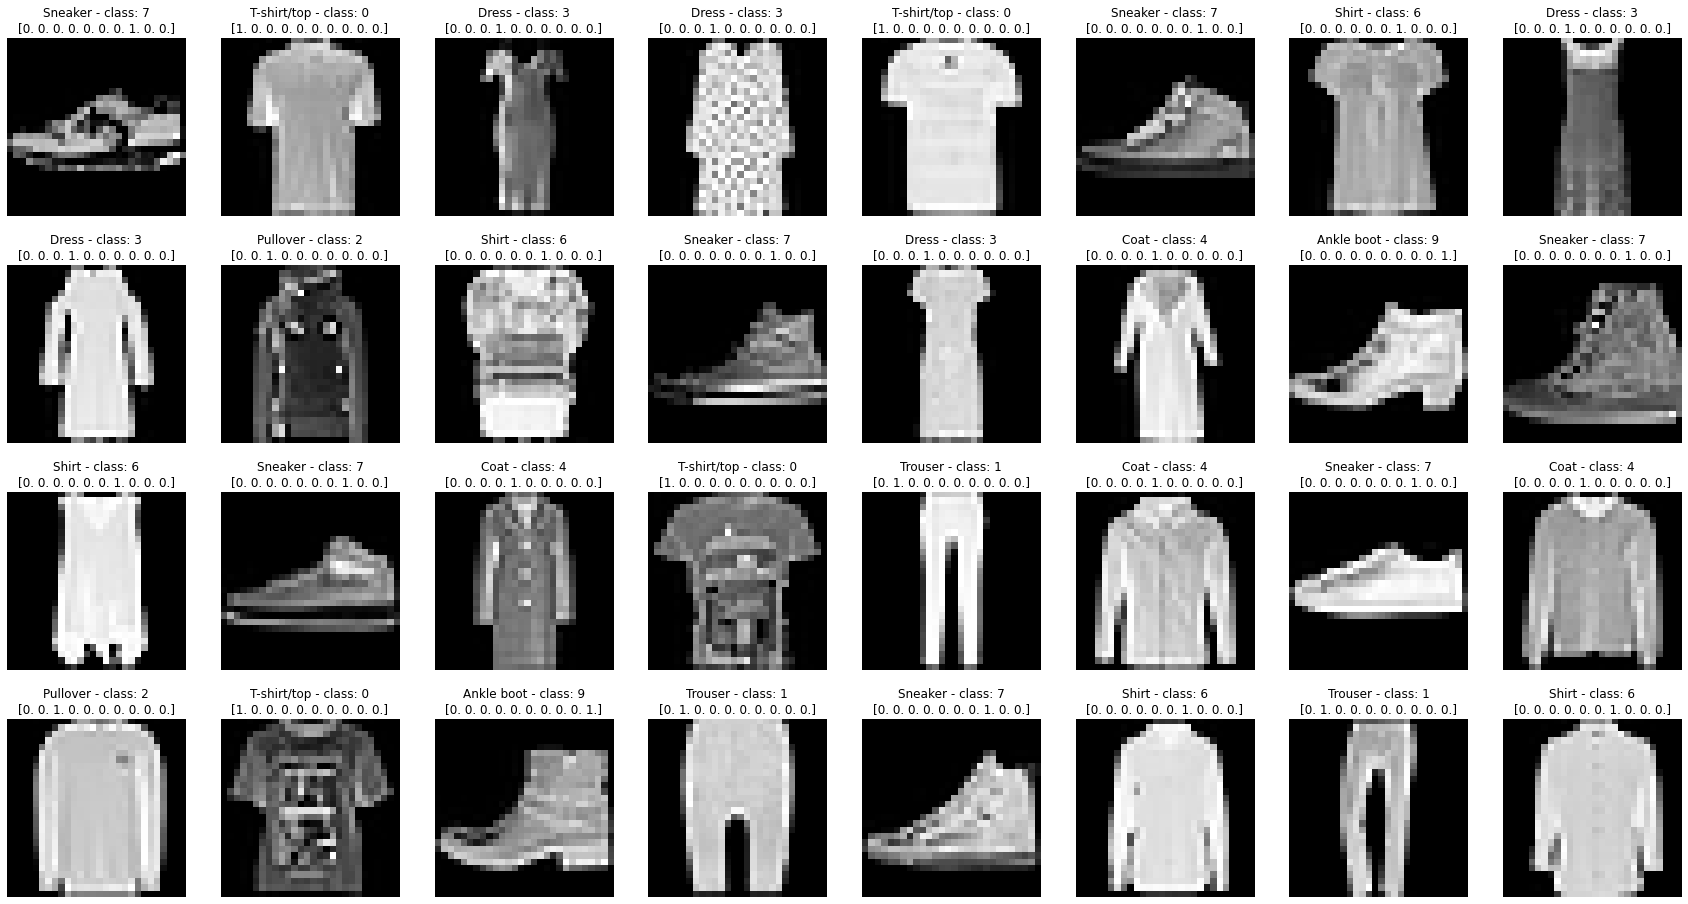

In [16]:
alto = 4
ancho = 8
f, axs = plt.subplots(alto, ancho, figsize=(30,4*alto))
axs = axs.reshape(-1)
for i in range(alto*ancho):
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].set_title(f'{classes[int(y_train[i])]} - class: {int(y_train[i])}\n{y_train_categorical[i]}')
    axs[i].axis('off')

In [140]:
output_size = 10
model_single_layer = Sequential()
model_single_layer.add(Flatten(input_shape=x_train.shape[1:]))
model_single_layer.add(BatchNormalization())
model_single_layer.add(Dense(100, activation='sigmoid', kernel_initializer='normal', name='middle'))
model_single_layer.add(Dense(output_size, name='Salida'))
model_single_layer.add(Activation('softmax'))
model_single_layer.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 middle (Dense)              (None, 100)               78500     
                                                                 
 Salida (Dense)              (None, 10)                1010      
                                                                 
 activation_12 (Activation)  (None, 10)                0         
                                                                 
Total params: 82,646
Trainable params: 81,078
Non-trainable params: 1,568
_____________________________________________

In [141]:
lr = 0.001 
SGD = optimizers.Adam(lr=lr)
model_single_layer.compile(loss = 'categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])

In [142]:
batch_size = 512
model_single_layer.fit(x_train, 
                       y_train_categorical,
                       epochs=20, batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_valid, y_val_categorical)
                      )

Epoch 1/20
106/106 [==============================] - 1s 6ms/step - loss: 0.7787 - accuracy: 0.7475 - val_loss: 0.5332 - val_accuracy: 0.8188
Epoch 2/20
106/106 [==============================] - 1s 5ms/step - loss: 0.4742 - accuracy: 0.8391 - val_loss: 0.4353 - val_accuracy: 0.8555
Epoch 3/20
106/106 [==============================] - 1s 5ms/step - loss: 0.4163 - accuracy: 0.8567 - val_loss: 0.3982 - val_accuracy: 0.8673
Epoch 4/20
106/106 [==============================] - 1s 5ms/step - loss: 0.3840 - accuracy: 0.8672 - val_loss: 0.3809 - val_accuracy: 0.8725
Epoch 5/20
106/106 [==============================] - 1s 5ms/step - loss: 0.3622 - accuracy: 0.8722 - val_loss: 0.3632 - val_accuracy: 0.8777
Epoch 6/20
106/106 [==============================] - 1s 5ms/step - loss: 0.3454 - accuracy: 0.8779 - val_loss: 0.3580 - val_accuracy: 0.8822
Epoch 7/20
106/106 [==============================] - 1s 5ms/step - loss: 0.3303 - accuracy: 0.8837 - val_loss: 0.3467 - val_accuracy: 0.8848
Epoch 

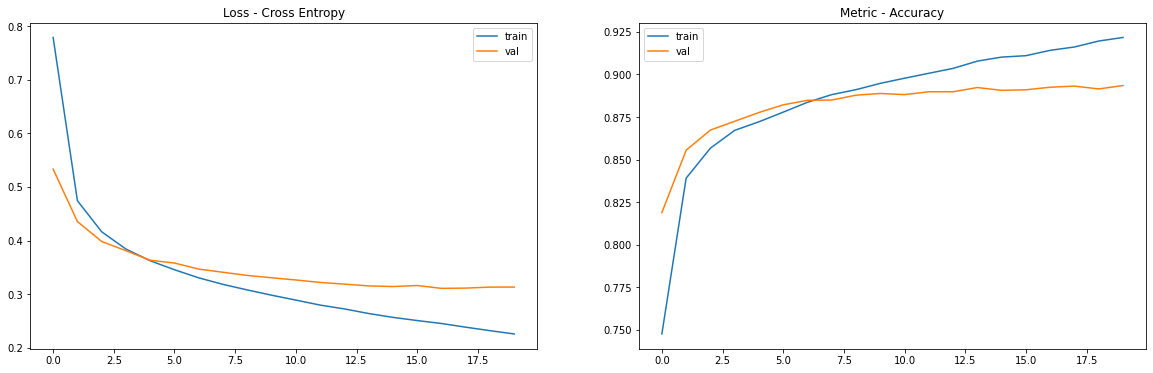

In [143]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.plot(model_single_layer.history.history['loss'], label='train')
ax1.plot(model_single_layer.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_single_layer.history.history['accuracy'], label='train')
ax2.plot(model_single_layer.history.history['val_accuracy'], label='val')
ax2.set_title('Metric - Accuracy')
ax2.legend()
plt.show()

In [144]:
loss, acc = model_single_layer.evaluate(x_valid, y_val_categorical, verbose=0)
print(acc, loss)

0.8934999704360962 0.3130819797515869


In [145]:
# Calculo probabilidades de cada clase para cada observación
test_prediction = model_single_layer.predict(x_test)
print(test_prediction.shape)

313/313 [==============================] - 0s 663us/step
(10000, 10)


In [146]:
# Calculo clase
test_labels = np.argmax(test_prediction, axis = 1)
print(test_labels)

[3 2 7 ... 2 0 7]


In [147]:
import pandas
df = pandas.DataFrame(data={"Category": test_labels}).astype(int)
df.to_csv("./submission.csv", sep=',',index=True,  index_label='Id')